In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = scripts.Analysis()

In [3]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_50_T_250',
                          'min_1e-20_max_5e-18_ng_5',
                          'wgt_1_.85_.7_.6_.5',
                          'subarctic_winter')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [4]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'o3',
                               'band05_wn_980_1100',
                               'P_50_T_250',
                               'min_1e-20_max_5e-18_ng_5',
                               'wgt_1_.85_.7_.6_.5',
                               'subarctic_winter')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [5]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [6]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [7]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [8]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [22]:
fig.display_hrefanchor()

In [23]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [24]:
table_dgdgs.display_hrefanchor()

In [25]:
for g in [1, 2, 3, 4, 5]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

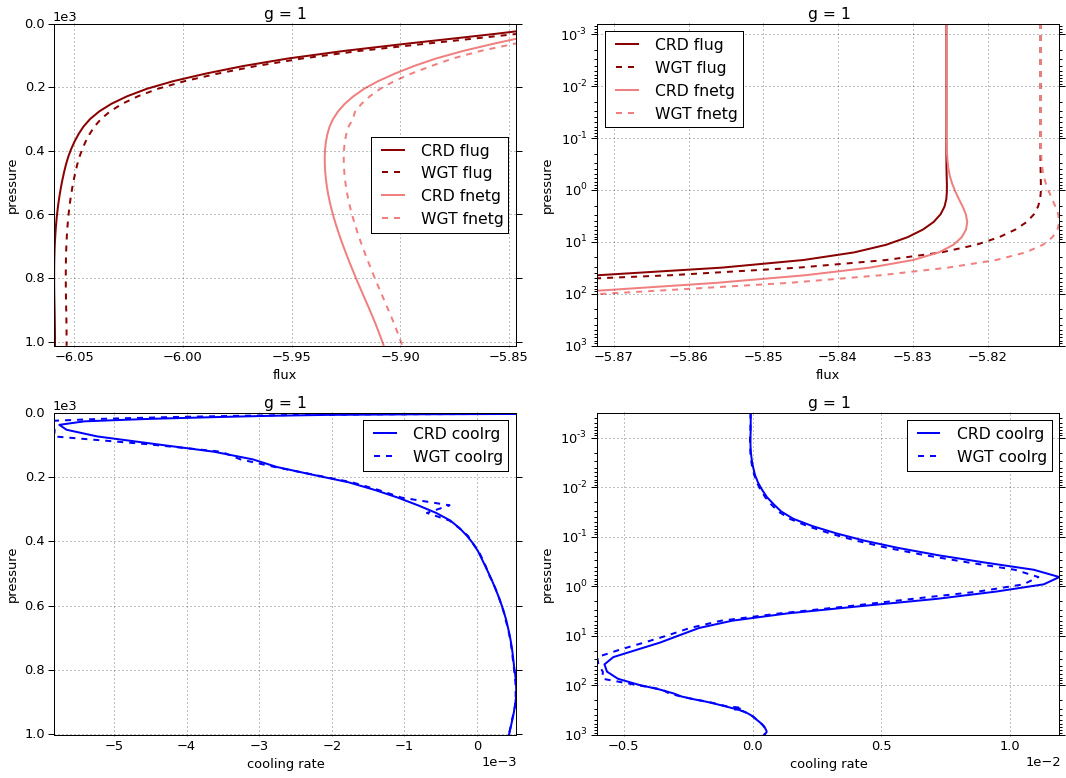

# Figure: flux, cooling rate. g-group 2

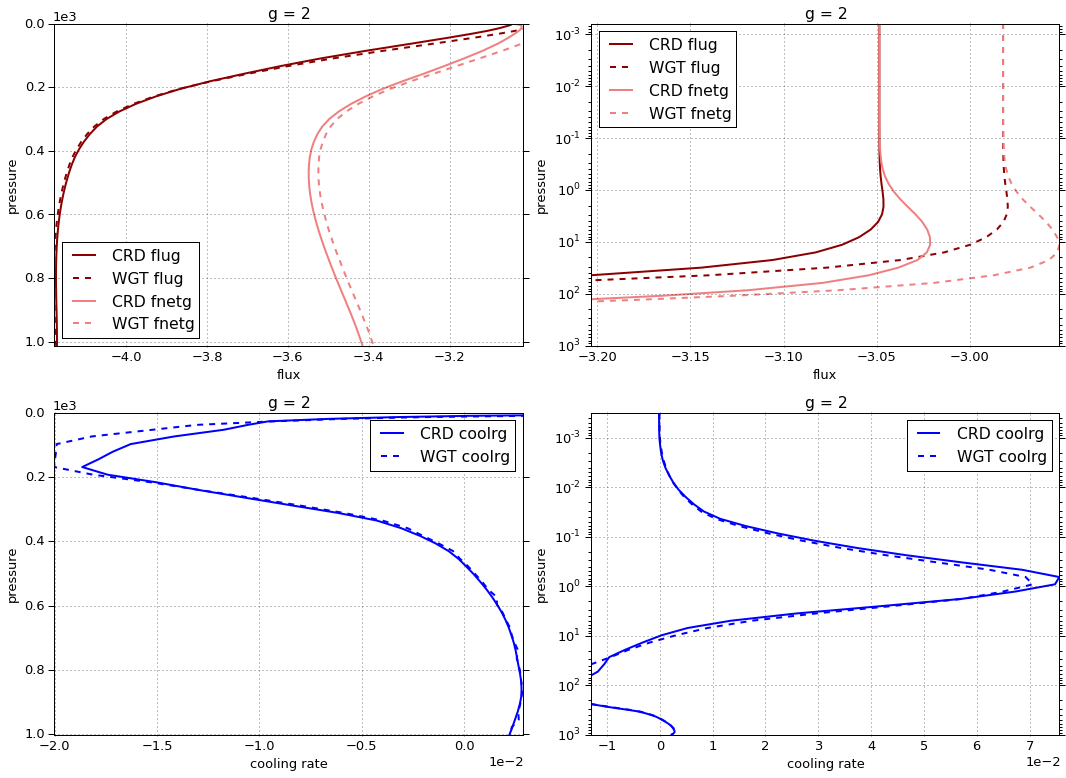

# Figure: flux, cooling rate. g-group 3

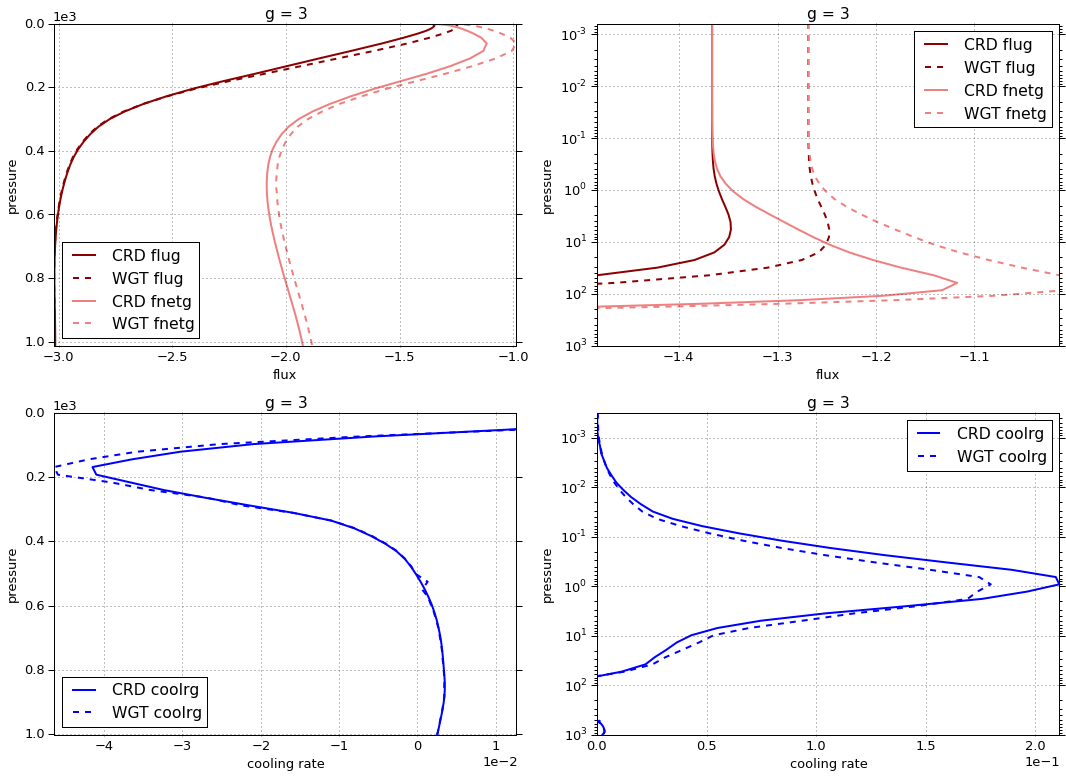

# Figure: flux, cooling rate. g-group 4

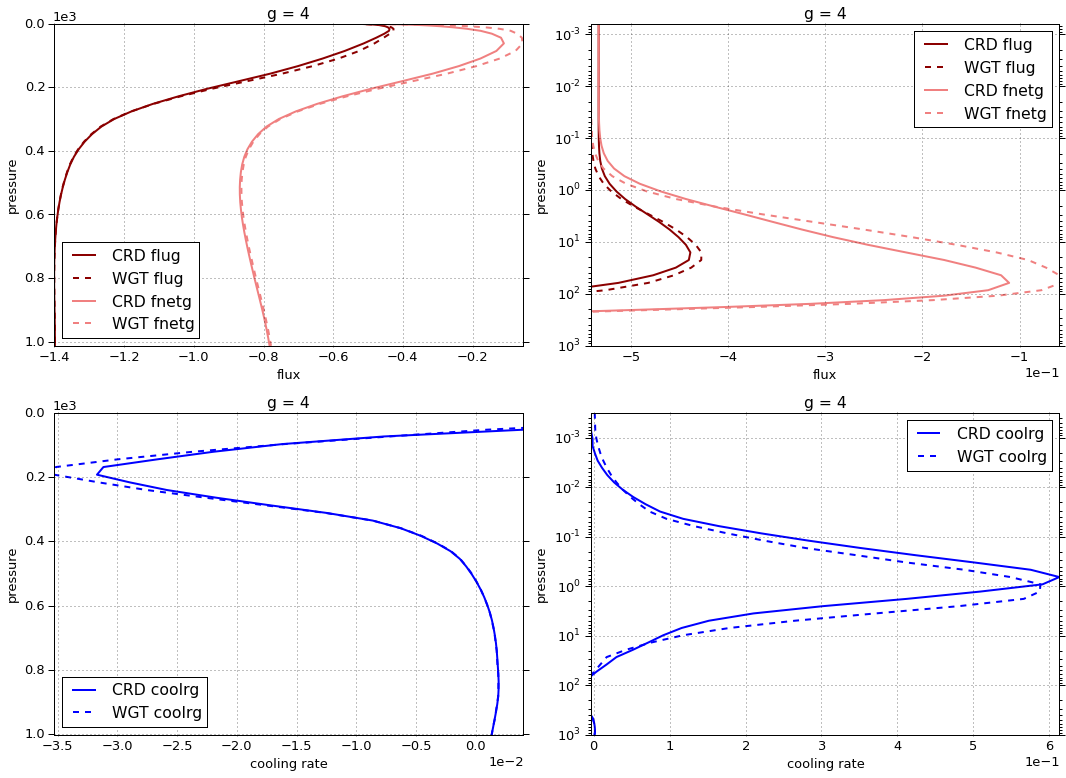

# Figure: flux, cooling rate. g-group 5

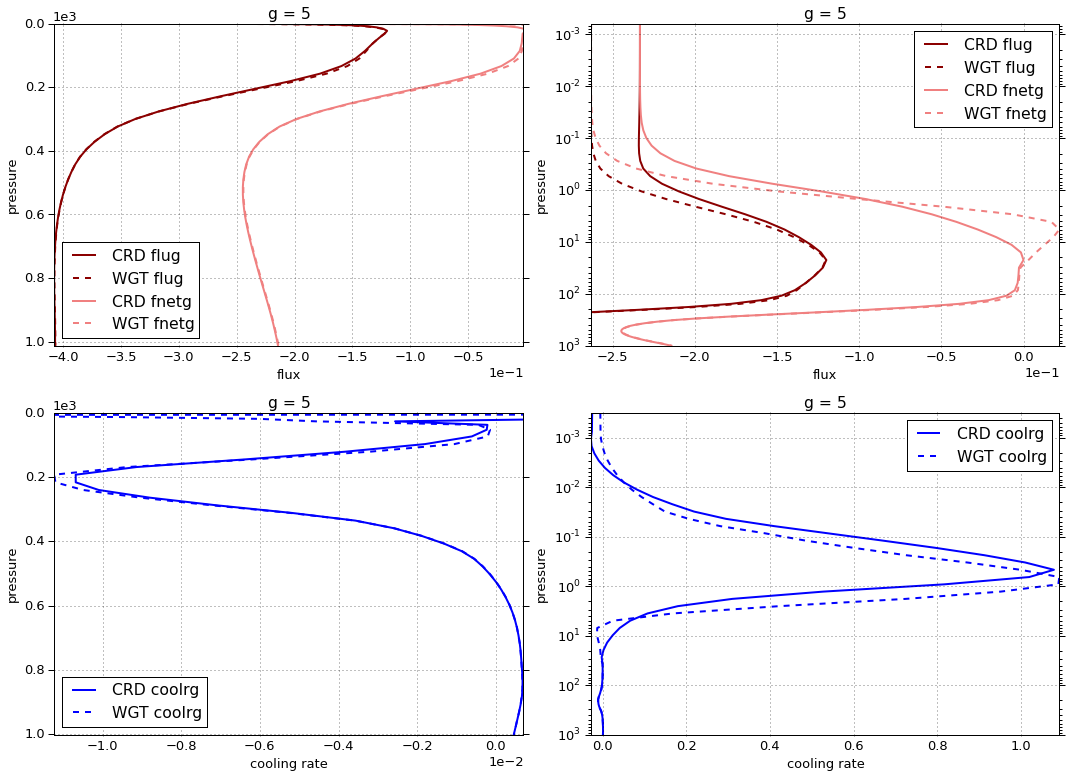

# Figure: flux, cooling rate. g-group total

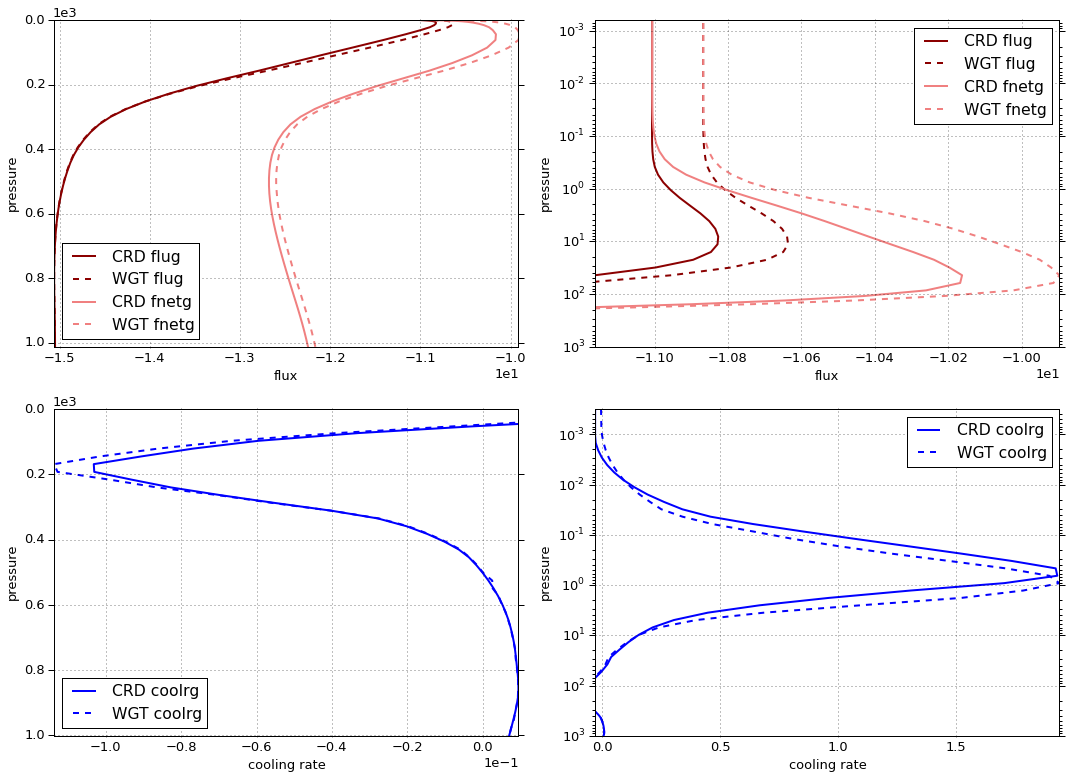

In [13]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [14]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg     fnetg
g pressure level                              
1 0        1     -5.825540  0.000000 -5.825540
  1013     76    -6.058956  0.151338 -5.907618
2 0        1     -3.048600  0.000000 -3.048600
  1013     76    -4.171901  0.756576 -3.415325
3 0        1     -1.366456  0.000000 -1.366456
  1013     76    -3.015330  1.089241 -1.926089
4 0        1     -0.533074  0.000000 -0.533074
  1013     76    -1.398187  0.615481 -0.782707
5 0        1     -0.233362  0.000000 -0.233362
  1013     76    -0.407029  0.192721 -0.214308


WGT


flug      fldg     fnetg
g pressure level                              
1 0        1     -5.812954  0.000000 -5.812954
  1013     76    -6.053616  0.154571 -5.899045
2 0        1     -2.982178  0.000000 -2.982178
  1013     76    -4.176529  0.788400 -3.388129
3 0        1     -1.268737  0.000000 -1.268737
  1013     76    -3.016475  1.131361 -1.885114
4 0        1     -0.541005  0.000000 -0.541005
  1013     76    -1.397976  0.619436 -0.778540
5 0        1     -0.263116  0.000000 -0.263116
  1013     76    -0.406807  0.192950 -0.213857


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.012585  0.000000  0.012585
  1013     76     0.005340  0.003233  0.008572
2 0        1      0.066422  0.000000  0.066422
  1013     76    -0.004628  0.031824  0.027197
3 0        1      0.097719  0.000000  0.097719
  1013     76    -0.001146  0.042121  0.040975
4 0        1     -0.007931  0.000000 -0.007931
  1013     76     0.000211  0.003955  0.004167
5 0        1     -0.029755  0.000000 -0.029755
  1013     76     0.000222  0.000229  0.000451

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000075
  1001.112500 75     0.000440
2 0.000312    1     -0.000150
  1001.112500 75     0.002207
3 0.000312    1      0.000094
  1001.112500 75     0.002545
4 0.000312    1     -0.003399
  1001.112500 75     0.001331
5 0.000312    1     -0.025298
  1001.112500 75     0.000459


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000084
  1001.112500 75     0.000438
2 0.000312    1     -0.000078
  1001.112500 75     0.002240
3 0.000312    1      0.000430
  1001.112500 75     0.002532
4 0.000312    1      0.001593
  1001.112500 75     0.001339
5 0.000312    1     -0.005793
  1001.112500 75     0.000462


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000008
  1001.112500 75    -0.000002
2 0.000312    1      0.000072
  1001.112500 75     0.000032
3 0.000312    1      0.000336
  1001.112500 75    -0.000014
4 0.000312    1      0.004991
  1001.112500 75     0.000007
5 0.000312    1      0.019505
  1001.112500 75     0.000003

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-11.007032,0.000000,-11.007032
1013,76,-15.051403,2.805356,-12.246047



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-10.867990,0.000000,-10.867990
1013,76,-15.051403,2.886718,-12.164685



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,1.390416e-01,0.000000,0.139042
1013,76,5.000000e-08,0.081362,0.081362


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.028828
1001.112500,75,0.006984



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.003932
1001.112500,75,0.007010



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.024896
1001.112500,75,0.000027


In [15]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.410750,0.402196
2,0.271208,0.277484
3,0.198167,0.200412
4,0.092708,0.092880
5,0.027167,0.027028


In [16]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      1     1 -5.825540  0.000000e+00 -5.825540   1     1 -5.812954   
0.000624      1     2 -5.825540  5.330008e-09 -5.825540   1     2 -5.812954   
0.000876      1     3 -5.825540  8.008066e-09 -5.825540   1     3 -5.812954   
0.001229      1     4 -5.825540  1.333258e-08 -5.825540   1     4 -5.812954   
0.001723      1     5 -5.825540  2.363848e-08 -5.825540   1     5 -5.812954   
0.002417      1     6 -5.825540  4.297243e-08 -5.825540   1     6 -5.812954   
0.003391      1     7 -5.825540  7.844630e-08 -5.825540   1     7 -5.812954   
0.004757      1     8 -5.825540  1.424283e-07 -5.825540   1     8 -5.812954   
0.006672      1     9 -5.825540  2.562766e-07 -5.825540   1     9 -5.812954   
0.009359      1    10 -5.825540  4.567253e-07 -5.825540   1    10 -5.812955   
0.013128      1    11 -5.825540  8.064407e-07 -5.825539   1    11 -5.812955   
0.018415      1    12 -5.825540  1.412660e-06 -5.825539   1    12 -5.812955   
0.025830      1    13 -5.825541  2.456440e-06 -5.825538   1    13 -5.812955   
0.036232      1    14 -5.825541  4.239311e-06 -5.825537   1    14 -5.812956   
0.050823      1    15 -5.825542  7.491762e-06 -5.825534   1    15 -5.812957   
0.071291      1    16 -5.825542  1.376081e-05 -5.825529   1    16 -5.812957   
0.100000      1    17 -5.825543  2.546695e-05 -5.825518   1    17 -5.812958   
0.140271      1    18 -5.825543  4.651085e-05 -5.825497   1    18 -5.812959   
0.196760      1    19 -5.825543  8.340080e-05 -5.825459   1    19 -5.812959   
0.275997      1    20 -5.825538  1.468858e-04 -5.825392   1    20 -5.812956   
0.387100      1    21 -5.825527  2.544833e-04 -5.825273   1    21 -5.812947   
0.543100      1    22 -5.825505  4.332270e-04 -5.825071   1    22 -5.812928   
0.761700      1    23 -5.825477  7.137888e-04 -5.824763   1    23 -5.812907   
1.068500      1    24 -5.825473  1.120333e-03 -5.824352   1    24 -5.812912   
1.498800      1    25 -5.825550  1.678468e-03 -5.823871   1    25 -5.813000   
2.102400      1    26 -5.825797  2.435959e-03 -5.823361   1    26 -5.813288   
2.949000      1    27 -5.826321  3.380995e-03 -5.822940   1    27 -5.813836   
4.136600      1    28 -5.827237  4.485460e-03 -5.822751   1    28 -5.814783   
5.802500      1    29 -5.828669  5.760749e-03 -5.822909   1    29 -5.816304   
8.139200      1    30 -5.830719  7.233682e-03 -5.823485   1    30 -5.818469   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    1    47 -6.045849  1.133210e-01 -5.932528   1    47 -6.040805   
347.300000    1    48 -6.048126  1.145635e-01 -5.933562   1    48 -6.043052   
371.075000    1    49 -6.049992  1.157547e-01 -5.934237   1    49 -6.044886   
394.850000    1    50 -6.051560  1.169345e-01 -5.934626   1    50 -6.046426   
418.625000    1    51 -6.052855  1.180776e-01 -5.934778   1    51 -6.047693   
442.400000    1    52 -6.053895  1.191553e-01 -5.934740   1    52 -6.048709   
466.175000    1    53 -6.054756  1.201991e-01 -5.934557   1    53 -6.049547   
489.950000    1    54 -6.055519  1.212899e-01 -5.934229   1    54 -6.050290   
513.725000    1    55 -6.056198  1.224365e-01 -5.933762   1    55 -6.050951   
537.500000    1    56 -6.056798  1.236373e-01 -5.933161   1    56 -6.051533   
561.275000    1    57 -6.057323  1.248862e-01 -5.932437   1    57 -6.052042   
585.050000    1    58 -6.057774  1.261807e-01 -5.931594   1    58 -6.052479   
608.825000    1    59 -6.058158  1.275132e-01 -5.930644   1    59 -6.052849   
632.600000    1    60 -6.058478  1.288791e-01 -5.929598   1    60 -6.053158   
656.375000    1    61 -6.058739  1.302730e-01 -5.928466   1    61 -6.053411   
680.150000    1    62 -6.058947  1.316822e-01 -5.927264   1    62 -6.053611   
703.925000    1    63 -6.059106  1.331095e-01 -5.925997   1   

In [17]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      2     1 -3.048600  0.000000e+00 -3.048600   2     1 -2.982178   
0.000624      2     2 -3.048600  3.022948e-08 -3.048600   2     2 -2.982178   
0.000876      2     3 -3.048600  4.542740e-08 -3.048600   2     3 -2.982178   
0.001229      2     4 -3.048600  7.565609e-08 -3.048600   2     4 -2.982178   
0.001723      2     5 -3.048600  1.341659e-07 -3.048600   2     5 -2.982178   
0.002417      2     6 -3.048600  2.438684e-07 -3.048600   2     6 -2.982178   
0.003391      2     7 -3.048600  4.449163e-07 -3.048600   2     7 -2.982178   
0.004757      2     8 -3.048601  8.068942e-07 -3.048600   2     8 -2.982178   
0.006672      2     9 -3.048601  1.449462e-06 -3.048599   2     9 -2.982178   
0.009359      2    10 -3.048601  2.577433e-06 -3.048599   2    10 -2.982179   
0.013128      2    11 -3.048601  4.538284e-06 -3.048597   2    11 -2.982179   
0.018415      2    12 -3.048602  7.923060e-06 -3.048594   2    12 -2.982179   
0.025830      2    13 -3.048602  1.372287e-05 -3.048588   2    13 -2.982179   
0.036232      2    14 -3.048601  2.357592e-05 -3.048578   2    14 -2.982178   
0.050823      2    15 -3.048600  4.145562e-05 -3.048558   2    15 -2.982175   
0.071291      2    16 -3.048594  7.576620e-05 -3.048519   2    16 -2.982169   
0.100000      2    17 -3.048582  1.395685e-04 -3.048443   2    17 -2.982155   
0.140271      2    18 -3.048557  2.537481e-04 -3.048303   2    18 -2.982126   
0.196760      2    19 -3.048506  4.529136e-04 -3.048053   2    19 -2.982072   
0.275997      2    20 -3.048409  7.937626e-04 -3.047616   2    20 -2.981970   
0.387100      2    21 -3.048229  1.367771e-03 -3.046861   2    21 -2.981785   
0.543100      2    22 -3.047908  2.314574e-03 -3.045593   2    22 -2.981473   
0.761700      2    23 -3.047433  3.798523e-03 -3.043635   2    23 -2.981010   
1.068500      2    24 -3.046876  5.959593e-03 -3.040916   2    24 -2.980414   
1.498800      2    25 -3.046422  8.933415e-03 -3.037488   2    25 -2.979877   
2.102400      2    26 -3.046360  1.295383e-02 -3.033406   2    26 -2.979638   
2.949000      2    27 -3.047141  1.792915e-02 -3.029211   2    27 -2.980191   
4.136600      2    28 -3.049262  2.369479e-02 -3.025567   2    28 -2.981953   
5.802500      2    29 -3.053232  3.031921e-02 -3.022913   2    29 -2.985497   
8.139200      2    30 -3.059436  3.797854e-02 -3.021457   2    30 -2.991180   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    2    47 -4.072976  5.577943e-01 -3.515182   2    47 -4.079786   
347.300000    2    48 -4.090778  5.635844e-01 -3.527193   2    48 -4.097406   
371.075000    2    49 -4.105271  5.694252e-01 -3.535846   2    49 -4.111682   
394.850000    2    50 -4.117360  5.754354e-01 -3.541925   2    50 -4.123572   
418.625000    2    51 -4.127246  5.814135e-01 -3.545833   2    51 -4.133269   
442.400000    2    52 -4.135102  5.871454e-01 -3.547957   2    52 -4.140913   
466.175000    2    53 -4.141530  5.927840e-01 -3.548746   2    53 -4.147173   
489.950000    2    54 -4.147167  5.987036e-01 -3.548463   2    54 -4.152649   
513.725000    2    55 -4.152134  6.049668e-01 -3.547167   2    55 -4.157498   
537.500000    2    56 -4.156472  6.115175e-01 -3.544954   2    56 -4.161715   
561.275000    2    57 -4.160228  6.183435e-01 -3.541885   2    57 -4.165348   
585.050000    2    58 -4.163433  6.253944e-01 -3.538039   2    58 -4.168440   
608.825000    2    59 -4.166130  6.326250e-01 -3.533505   2    59 -4.171019   
632.600000    2    60 -4.168367  6.400205e-01 -3.528346   2    60 -4.173169   
656.375000    2    61 -4.170185  6.475219e-01 -3.522663   2    61 -4.174922   
680.150000    2    62 -4.171623  6.550908e-01 -3.516533   2    62 -4.176306   
703.925000    2    63 -4.172725  6.626907e-01 -3.510035   2   

In [18]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      3     1 -1.366456  0.000000e+00 -1.366456   3     1 -1.268737   
0.000624      3     2 -1.366457  7.812110e-08 -1.366456   3     2 -1.268737   
0.000876      3     3 -1.366457  1.174624e-07 -1.366456   3     3 -1.268737   
0.001229      3     4 -1.366457  1.959819e-07 -1.366456   3     4 -1.268737   
0.001723      3     5 -1.366457  3.483520e-07 -1.366456   3     5 -1.268737   
0.002417      3     6 -1.366457  6.345706e-07 -1.366456   3     6 -1.268737   
0.003391      3     7 -1.366457  1.159735e-06 -1.366456   3     7 -1.268737   
0.004757      3     8 -1.366457  2.105752e-06 -1.366455   3     8 -1.268737   
0.006672      3     9 -1.366457  3.784835e-06 -1.366454   3     9 -1.268737   
0.009359      3    10 -1.366458  6.729972e-06 -1.366451   3    10 -1.268736   
0.013128      3    11 -1.366457  1.184246e-05 -1.366445   3    11 -1.268735   
0.018415      3    12 -1.366456  2.064942e-05 -1.366436   3    12 -1.268733   
0.025830      3    13 -1.366454  3.569996e-05 -1.366418   3    13 -1.268729   
0.036232      3    14 -1.366448  6.118562e-05 -1.366387   3    14 -1.268721   
0.050823      3    15 -1.366434  1.072739e-04 -1.366327   3    15 -1.268706   
0.071291      3    16 -1.366406  1.954313e-04 -1.366210   3    16 -1.268675   
0.100000      3    17 -1.366348  3.588037e-04 -1.365990   3    17 -1.268615   
0.140271      3    18 -1.366238  6.499367e-04 -1.365588   3    18 -1.268503   
0.196760      3    19 -1.366031  1.155000e-03 -1.364876   3    19 -1.268301   
0.275997      3    20 -1.365655  2.013062e-03 -1.363642   3    20 -1.267941   
0.387100      3    21 -1.364983  3.443561e-03 -1.361539   3    21 -1.267315   
0.543100      3    22 -1.363819  5.773599e-03 -1.358046   3    22 -1.266250   
0.761700      3    23 -1.362006  9.380357e-03 -1.352626   3    23 -1.264512   
1.068500      3    24 -1.359524  1.456246e-02 -1.344961   3    24 -1.262155   
1.498800      3    25 -1.356498  2.153699e-02 -1.334961   3    25 -1.259284   
2.102400      3    26 -1.353095  3.069325e-02 -1.322402   3    26 -1.255666   
2.949000      3    27 -1.349911  4.167216e-02 -1.308239   3    27 -1.252074   
4.136600      3    28 -1.347751  5.412687e-02 -1.293624   3    28 -1.249084   
5.802500      3    29 -1.347326  6.846271e-02 -1.278863   3    29 -1.247467   
8.139200      3    30 -1.349152  8.551357e-02 -1.263638   3    30 -1.247785   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    3    47 -2.824692  8.362430e-01 -1.988449   3    47 -2.829621   
347.300000    3    48 -2.861182  8.417452e-01 -2.019437   3    48 -2.865873   
371.075000    3    49 -2.890438  8.482721e-01 -2.042166   3    49 -2.894721   
394.850000    3    50 -2.914439  8.555743e-01 -2.058865   3    50 -2.918336   
418.625000    3    51 -2.933742  8.632425e-01 -2.070499   3    51 -2.937239   
442.400000    3    52 -2.948821  8.708386e-01 -2.077982   3    52 -2.951982   
466.175000    3    53 -2.960941  8.784572e-01 -2.082484   3    53 -2.963805   
489.950000    3    54 -2.971393  8.865758e-01 -2.084817   3    54 -2.973959   
513.725000    3    55 -2.980454  8.951586e-01 -2.085295   3    55 -2.982814   
537.500000    3    56 -2.988248  9.041463e-01 -2.084102   3    56 -2.990364   
561.275000    3    57 -2.994901  9.134972e-01 -2.081404   3    57 -2.996811   
585.050000    3    58 -3.000501  9.231228e-01 -2.077378   3    58 -3.002220   
608.825000    3    59 -3.005154  9.329711e-01 -2.072183   3    59 -3.006732   
632.600000    3    60 -3.008970  9.429444e-01 -2.066025   3    60 -3.010424   
656.375000    3    61 -3.012039  9.529969e-01 -2.059042   3    61 -3.013371   
680.150000    3    62 -3.014445  9.630304e-01 -2.051414   3    62 -3.015695   
703.925000    3    63 -3.016273  9.730549e-01 -2.043218   3   

In [19]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -0.533074  0.000000e+00 -0.533074   4     1 -0.541005   
0.000624      4     2 -0.533075  4.386415e-07 -0.533074   4     2 -0.541005   
0.000876      4     3 -0.533075  6.569844e-07 -0.533075   4     3 -0.541005   
0.001229      4     4 -0.533076  1.082568e-06 -0.533075   4     4 -0.541005   
0.001723      4     5 -0.533077  1.888978e-06 -0.533075   4     5 -0.541005   
0.002417      4     6 -0.533078  3.368163e-06 -0.533075   4     6 -0.541005   
0.003391      4     7 -0.533080  6.018535e-06 -0.533074   4     7 -0.541005   
0.004757      4     8 -0.533083  1.068100e-05 -0.533072   4     8 -0.541005   
0.006672      4     9 -0.533087  1.876265e-05 -0.533068   4     9 -0.541005   
0.009359      4    10 -0.533092  3.260602e-05 -0.533059   4    10 -0.541004   
0.013128      4    11 -0.533098  5.607260e-05 -0.533042   4    11 -0.541000   
0.018415      4    12 -0.533105  9.554234e-05 -0.533009   4    12 -0.540994   
0.025830      4    13 -0.533110  1.613835e-04 -0.532949   4    13 -0.540980   
0.036232      4    14 -0.533111  2.701746e-04 -0.532841   4    14 -0.540955   
0.050823      4    15 -0.533100  4.624758e-04 -0.532637   4    15 -0.540906   
0.071291      4    16 -0.533060  8.229433e-04 -0.532238   4    16 -0.540806   
0.100000      4    17 -0.532963  1.476443e-03 -0.531486   4    17 -0.540613   
0.140271      4    18 -0.532746  2.610697e-03 -0.530136   4    18 -0.540256   
0.196760      4    19 -0.532303  4.514833e-03 -0.527788   4    19 -0.539626   
0.275997      4    20 -0.531433  7.625219e-03 -0.523808   4    20 -0.538461   
0.387100      4    21 -0.529778  1.256583e-02 -0.517212   4    21 -0.536502   
0.543100      4    22 -0.526726  2.014717e-02 -0.506579   4    22 -0.533135   
0.761700      4    23 -0.521815  3.111014e-02 -0.490705   4    23 -0.527895   
1.068500      4    24 -0.514805  4.557515e-02 -0.469230   4    24 -0.520118   
1.498800      4    25 -0.505882  6.257515e-02 -0.443307   4    25 -0.509732   
2.102400      4    26 -0.494953  8.110932e-02 -0.413844   4    26 -0.496466   
2.949000      4    27 -0.482854  9.928753e-02 -0.383566   4    27 -0.481543   
4.136600      4    28 -0.470922  1.169552e-01 -0.353967   4    28 -0.466727   
5.802500      4    29 -0.460154  1.361609e-01 -0.323993   4    29 -0.453427   
8.139200      4    30 -0.450939  1.590330e-01 -0.291906   4    30 -0.442263   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -1.264953  4.736395e-01 -0.791314   4    47 -1.266995   
347.300000    4    48 -1.291790  4.762163e-01 -0.815574   4    48 -1.293748   
371.075000    4    49 -1.312989  4.797429e-01 -0.833246   4    49 -1.314768   
394.850000    4    50 -1.330122  4.839489e-01 -0.846173   4    50 -1.331639   
418.625000    4    51 -1.343702  4.884627e-01 -0.855239   4    51 -1.344978   
442.400000    4    52 -1.354160  4.929785e-01 -0.861182   4    52 -1.355223   
466.175000    4    53 -1.362452  4.975157e-01 -0.864936   4    53 -1.363296   
489.950000    4    54 -1.369507  5.023332e-01 -0.867174   4    54 -1.370199   
513.725000    4    55 -1.375549  5.074235e-01 -0.868126   4    55 -1.376077   
537.500000    4    56 -1.380689  5.127357e-01 -0.867954   4    56 -1.381065   
561.275000    4    57 -1.385031  5.182274e-01 -0.866804   4    57 -1.385282   
585.050000    4    58 -1.388652  5.238400e-01 -0.864812   4    58 -1.388803   
608.825000    4    59 -1.391634  5.295305e-01 -0.862104   4    59 -1.391680   
632.600000    4    60 -1.394060  5.352656e-01 -0.858794   4    60 -1.394033   
656.375000    4    61 -1.395997  5.410108e-01 -0.854986   4    61 -1.395898   
680.150000    4    62 -1.397506  5.467170e-01 -0.850789   4    62 -1.397360   
703.925000    4    63 -1.398646  5.523683e-01 -0.846278   4   

In [20]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 5

crd                                     wgt                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      5     1 -0.233362  0.000000 -0.233362   5     1 -0.263116   
0.000624      5     2 -0.233365  0.000002 -0.233363   5     2 -0.263118   
0.000876      5     3 -0.233367  0.000003 -0.233364   5     3 -0.263118   
0.001229      5     4 -0.233370  0.000004 -0.233365   5     4 -0.263119   
0.001723      5     5 -0.233374  0.000007 -0.233367   5     5 -0.263121   
0.002417      5     6 -0.233381  0.000013 -0.233369   5     6 -0.263123   
0.003391      5     7 -0.233392  0.000022 -0.233370   5     7 -0.263127   
0.004757      5     8 -0.233408  0.000039 -0.233369   5     8 -0.263132   
0.006672      5     9 -0.233431  0.000068 -0.233363   5     9 -0.263139   
0.009359      5    10 -0.233463  0.000116 -0.233347   5    10 -0.263148   
0.013128      5    11 -0.233506  0.000196 -0.233310   5    11 -0.263158   
0.018415      5    12 -0.233563  0.000328 -0.233235   5    12 -0.263169   
0.025830      5    13 -0.233632  0.000544 -0.233088   5    13 -0.263177   
0.036232      5    14 -0.233713  0.000894 -0.232819   5    14 -0.263181   
0.050823      5    15 -0.233808  0.001498 -0.232310   5    15 -0.263153   
0.071291      5    16 -0.233919  0.002602 -0.231317   5    16 -0.263084   
0.100000      5    17 -0.234025  0.004545 -0.229480   5    17 -0.262870   
0.140271      5    18 -0.234062  0.007783 -0.226279   5    18 -0.262486   
0.196760      5    19 -0.233886  0.012945 -0.220940   5    19 -0.261725   
0.275997      5    20 -0.233195  0.020825 -0.212370   5    20 -0.260253   
0.387100      5    21 -0.231361  0.032291 -0.199070   5    21 -0.257475   
0.543100      5    22 -0.227136  0.048009 -0.179127   5    22 -0.252394   
0.761700      5    23 -0.219936  0.067227 -0.152709   5    23 -0.244240   
1.068500      5    24 -0.209694  0.086690 -0.123004   5    24 -0.232414   
1.498800      5    25 -0.197457  0.101341 -0.096116   5    25 -0.217490   
2.102400      5    26 -0.183660  0.109707 -0.073953   5    26 -0.199743   
2.949000      5    27 -0.169401  0.113463 -0.055938   5    27 -0.181105   
4.136600      5    28 -0.156272  0.115415 -0.040857   5    28 -0.164021   
5.802500      5    29 -0.145426  0.117514 -0.027912   5    29 -0.150217   
8.139200      5    30 -0.136729  0.120066 -0.016663   5    30 -0.139622   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    5    47 -0.352961  0.139950 -0.213012   5    47 -0.353177   
347.300000    5    48 -0.364086  0.141014 -0.223072   5    48 -0.364322   
371.075000    5    49 -0.372831  0.142468 -0.230363   5    49 -0.373031   
394.850000    5    50 -0.379857  0.144184 -0.235673   5    50 -0.380020   
418.625000    5    51 -0.385391  0.146004 -0.239387   5    51 -0.385507   
442.400000    5    52 -0.389624  0.147804 -0.241820   5    52 -0.389691   
466.175000    5    53 -0.392956  0.149594 -0.243362   5    53 -0.392990   
489.950000    5    54 -0.395773  0.151478 -0.244295   5    54 -0.395764   
513.725000    5    55 -0.398169  0.153451 -0.244719   5    55 -0.398124   
537.500000    5    56 -0.400196  0.155491 -0.244705   5    56 -0.400116   
561.275000    5    57 -0.401899  0.157584 -0.244315   5    57 -0.401787   
585.050000    5    58 -0.403311  0.159706 -0.243605   5    58 -0.403174   
608.825000    5    59 -0.404469  0.161844 -0.242626   5    59 -0.404312   
632.600000    5    60 -0.405408  0.163984 -0.241423   5    60 -0.405232   
656.375000    5    61 -0.406154  0.166113 -0.240041   5    61 -0.405960   
680.150000    5    62 -0.406733  0.168217 -0.238517   5    62 -0.406526   
703.925000    5    63 -0.407170  0.170288 -0.236882   5    63 -0.406952   
727.700000    5    64 -0.407485  0.172325 -0.235160   5    64 -0.407260   
751.475000    5    65 -0.407694  0.174320 -0.233375   5    65 -0.407463   
775.250000    5    66 -0.407812  0.17

In [26]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')